# Задачи оптимального управления
## Выполнил: Яковлев Артур. 853501
## Проверила: Костюкова О.И.

### Вариант 3

In [73]:
from scipy.integrate import odeint
import numpy as np
from qpsolvers import solve_qp
import matplotlib.pyplot as plt

Исходные данные

In [74]:
dataset = {
    'D': np.array([
         [9., 10, 5, 10],
         [10, 26, -5, 19],
         [5, -5, 18, 0],
         [10, 19, 0, 18],
    ]),
    't0': 0,
    't_ast': 10,
    'N': 100,
    'x0': np.array([-5., -4., -3., 1.]),
    'b': np.array([0., 0., 0., 1.]),
    'Ab': np.array([
        [0, 1, 0, 0.],
        [0, 0, 1, 0.],
        [0, 0, 0, 1.],
        [0, 0, 0, 0.],
    ]),
    'H': np.array([
        [1., 0, 1, 0],
        [1, 0, -1, 0]
    ]),
    'c': np.array([1., 0.5, -1., -1.]),
    'g': np.array([-21.3333, -35.3333]),
}

In [103]:
def solve(dataset):
    N = dataset['N']
    D = dataset['D']
    t0 = dataset['t0']
    t_ast = dataset['t_ast']
    x0 = dataset['x0']
    b = dataset['b']
    Ab = dataset['Ab']
    H = dataset['H']
    c = dataset['c']
    g = dataset['g']

    time = np.linspace(t0, t_ast, N + 1)
    int_1 = odeint(lambda q1, q2, q3: q3.dot(q1), x0, time, args=(Ab, ))
    plt.title('w(t)')
    plt.plot(time, int_1)
    plt.show()
    w = int_1[-1]
    print('w(t*) =', w, '\n')

    h = (t_ast - t0) / N
    time = np.linspace(t0, t0 + h)
    int_1 = odeint(lambda q1, q2, q3, q4: q3.dot(q1) + q4, np.zeros(b.shape[0]), time, args=(Ab, b,))
    print('y(t1) =', int_1[-1], '\n')

    time = np.linspace(t0 + h, t_ast, N)
    zt = odeint(lambda q1, q2, q3: q3.dot(q1), int_1[-1], time, args=(Ab,))
    plt.title('Solution to dz/dt = Az(t)')
    plt.plot(zt, time)
    plt.show()

    B0 = w.copy()
    B = np.concatenate(tuple(reversed(tuple(map(lambda q: np.vstack(q), zt)))), axis=1)
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            B[i][j] = round(B[i][j], 4)
    print('B0 =', B0)
    print('B =', B, '\n')

    print("Solving (B0 + BU)'D(B0 + BU) + c'(B0 + BU) -> min")

    D_ = (np.transpose(B) @ D).dot(B)
    A_ = H.dot(B)
    c_ = np.transpose(B).dot(c + D @ B0)
    b_ = g - H.dot(B0)
    u = solve_qp(D_ + np.eye(N) * 0.01, c_, None, None, A_, b_, np.array([-1. for _ in range(N)]), 
                 np.array([1. for _ in range(N)]))

    plt.title('Solution')
    plt.scatter(np.linspace(t0, t_ast, N), u, s=1)
    plt.show()

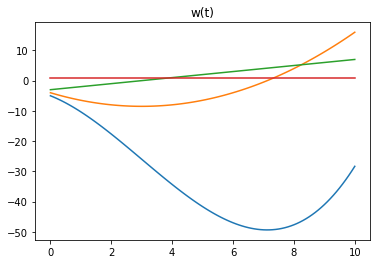

w(t*) = [-28.33333325  16.           7.           1.        ] 

y(t1) = [4.17138817e-06 1.66649197e-04 5.00000000e-03 1.00000000e-01] 



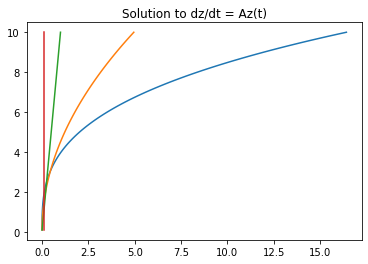

B0 = [-28.33333325  16.           7.           1.        ]
B = [[1.64183e+01 1.59283e+01 1.54481e+01 1.49776e+01 1.45168e+01 1.40655e+01
  1.36237e+01 1.31913e+01 1.27681e+01 1.23540e+01 1.19490e+01 1.15529e+01
  1.11657e+01 1.07873e+01 1.04175e+01 1.00562e+01 9.70340e+00 9.35890e+00
  9.02270e+00 8.69470e+00 8.37470e+00 8.06260e+00 7.75840e+00 7.46190e+00
  7.17310e+00 6.89190e+00 6.61810e+00 6.35160e+00 6.09240e+00 5.84030e+00
  5.59530e+00 5.35730e+00 5.12610e+00 4.90160e+00 4.68380e+00 4.47250e+00
  4.26770e+00 4.06930e+00 3.87710e+00 3.69100e+00 3.51100e+00 3.33690e+00
  3.16870e+00 3.00630e+00 2.84950e+00 2.69820e+00 2.55240e+00 2.41190e+00
  2.27670e+00 2.14670e+00 2.02170e+00 1.90160e+00 1.78640e+00 1.67590e+00
  1.57010e+00 1.46890e+00 1.37210e+00 1.27960e+00 1.19140e+00 1.10730e+00
  1.02730e+00 9.51300e-01 8.79100e-01 8.10600e-01 7.45800e-01 6.84500e-01
  6.26700e-01 5.72300e-01 5.21100e-01 4.73000e-01 4.28000e-01 3.85900e-01
  3.46700e-01 3.10300e-01 2.76500e-01 2.45200e-01

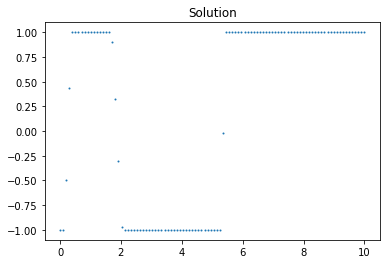

In [104]:
solve(dataset)